In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the spam dataset
data = pd.read_csv('mail_data.csv', encoding='latin-1')  # Change encoding if needed

# Preview the data
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
# Rename columns for clarity
data.columns = ['label', 'message']

# Remove any rows with missing values
data.dropna(inplace=True)

# Show class distribution
print(data['label'].value_counts())


label
ham     4825
spam     747
Name: count, dtype: int64


In [4]:
# Map ham to 0, spam to 1
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

print(data[['label', 'label_num']].head())

  label  label_num
0   ham          0
1   ham          0
2  spam          1
3   ham          0
4   ham          0


In [5]:
X = data['message']
y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 4457
Testing data size: 1115


In [6]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_train_counts, y_train)


MultinomialNB()

In [8]:
y_pred = model.predict(X_test_counts)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.9928251121076234
Confusion Matrix: [[966   0]
 [  8 141]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [9]:
sample_messages = [
    "Congratulations! You have won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.",
    "Hi, are you coming to the meeting today?"
]

sample_counts = vectorizer.transform(sample_messages)
predictions = model.predict(sample_counts)

for msg, pred in zip(sample_messages, predictions):
    print(f"Message: {msg}Spam? {'Yes' if pred else 'No'}")

Message: Congratulations! You have won a $1000 Walmart gift card. Go to http://bit.ly/123456 to claim now.Spam? Yes
Message: Hi, are you coming to the meeting today?Spam? No


In [10]:
import joblib
joblib.dump(model, 'spam_classifier_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [11]:
model = joblib.load('spam_classifier_model.joblib')
vectorizer = joblib.load('vectorizer.joblib')

In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_counts, y_train)
lr_preds = lr_model.predict(X_test_counts)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))

Logistic Regression Accuracy: 0.9865470852017937


In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_counts, y_train, cv=5)
print("Cross-Validation Accuracies:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracies: [0.9809417  0.9809417  0.97979798 0.97306397 0.98204265]
Average CV Accuracy: 0.9793576019286034


In [14]:
misclassified = X_test[y_test != y_pred]
for i in misclassified[:5]:
    print(i)

Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg Â£1.50
Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)
Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?


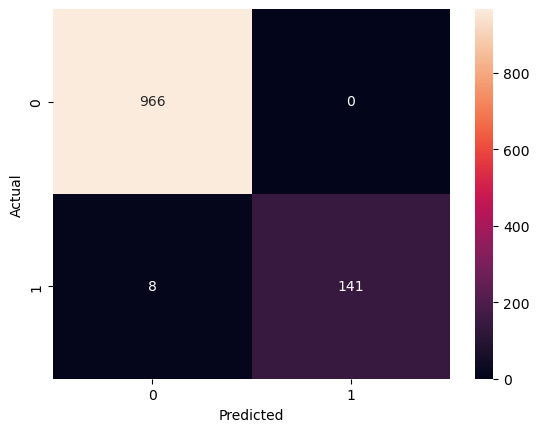

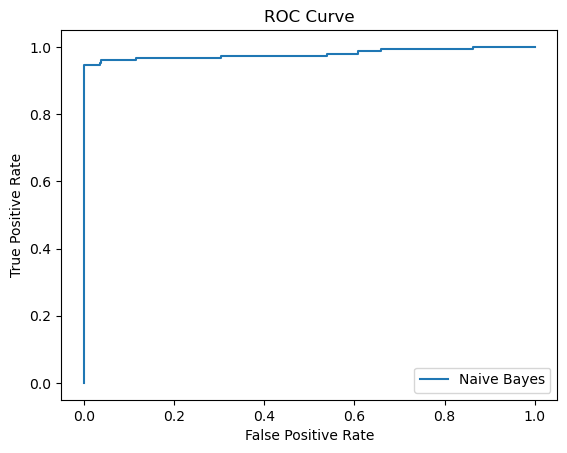

In [15]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Naive Bayes
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_counts)[:,1])
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
# Import required classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Naive Bayes (already trained as 'model')
nb_pred = model.predict(X_test_counts)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_pred))
print('Naive Bayes:')
print(classification_report(y_test, nb_pred))

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_counts, y_train)
lr_pred = lr.predict(X_test_counts)
print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_pred))
print('Logistic Regression:')
print(classification_report(y_test, lr_pred))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_counts, y_train)
rf_pred = rf.predict(X_test_counts)
print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred))
print('Random Forest:')
print(classification_report(y_test, rf_pred))

# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_counts, y_train)
svm_pred = svm.predict(X_test_counts)
print('SVM Accuracy:', accuracy_score(y_test, svm_pred))
print('Support Vector Machine:')
print(classification_report(y_test, svm_pred))

Naive Bayes Accuracy: 0.9928251121076234
Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Logistic Regression Accuracy: 0.9865470852017937
Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Random Forest Accuracy: 0.979372197309417
Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

 

In [17]:
# Function to predict if a single message is spam or not
def predict_spam(message):
    msg_vect = vectorizer.transform([message])
    prediction = model.predict(msg_vect)
    return "Spam" if prediction[0] == 1 else "Ham (Not Spam)"

# Jupyter: enter your message to test
test_message = "Hi your enrollment for aws certification is successfull"
print("Input Message:", test_message)
print("Prediction:", predict_spam(test_message))

Input Message: Hi your enrollment for aws certification is successfull
Prediction: Ham (Not Spam)


In [18]:
!pip install streamlit joblib scikit-learn

In [19]:
app_code = """
import streamlit as st
import joblib

# Load vectorizer and model
vectorizer = joblib.load('vectorizer.joblib')
model = joblib.load('spam_classifier_model.joblib')

st.title("Email Spam Detector")
st.write("Paste your email text below:")

user_input = st.text_area("Email Text:", height=150)

if st.button("Predict"):
    if user_input:
        X_input = vectorizer.transform([user_input])
        prediction = model.predict(X_input)[0]
        prob = model.predict_proba(X_input)[0].max()
        st.success(f"Prediction: {prediction.upper()}")
        st.info(f"Confidence: {prob:.2f}")
    else:
        st.warning("Please enter some text.")
"""

with open('app.py', 'w') as f:
    f.write(app_code)

In [ ]:
!streamlit run app.py

In [ ]:
requirements = """
streamlit
scikit-learn
pandas
joblib
"""

with open('requirements.txt', 'w') as file:
    file.write(requirements.strip())

print("requirements.txt created!")